In [50]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('Kerry_th.csv')
df = df.dropna()

column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1

,rating,caption
1,1.0,(Translated by Google) Very slow delivery Long...
3,1.0,(Translated by Google) delivery man The form h...
4,5.0,"(Translated by Google) Very good service, frie..."
5,1.0,เราส่งของตั้งแต่วันที่14/02/65จน24/02/65ก็ยังไ...
6,1.0,(Translated by Google) The delivery person is ...
...,...,...
198,5.0,"(Translated by Google) Good service, convenien..."
199,2.0,You pay a very high price but the delivery is ...
201,1.0,I booked on the app and was given a 2 hour pic...
202,5.0,(Translated by Google) Good company (Original...


In [52]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [53]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_54051/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [54]:
df1.to_csv('kerry1.csv')

### Run 2nd csv

In [55]:
df2 = pd.read_csv('Kerry_th2.csv')

In [56]:
df2 = df2.dropna()
column_titles = ['rating','caption']
df2 = df2.reindex(columns=column_titles)


df2['middle'] = df2['caption'].str.split(")").str[1]
df2['reviews'] = df2['middle'].str.split("(").str[0]

In [57]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_54051/2674474058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [58]:
df2.to_csv('kerry2.csv')

### Combining files together 

In [59]:
files = os.path.join("kerry*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_kerryth.csv")

### Clean the data

In [64]:
df_combi = pd.read_csv('combined_kerryth.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['Reviews_processed'] = pd.DataFrame(df_combi['reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,index,rating,caption,middle,reviews,Reviews_processed
0,0,0,2,1.0,Staff attitude is awful. Do yourself a favor ...,NaN,Staff attitude is awful. Do yourself a favor ...,staff attitude awful favor drive sukhumvit bra...
1,1,1,5,4.0,(Translated by Google) very good service Maybe...,very good service Maybe not many people He al...,very good service Maybe not many people He al...,good service maybe many people also came help ...
2,2,2,6,4.0,(Translated by Google) Friendly staff. (Origi...,Friendly staff. (Original,Friendly staff.,friendly staff
3,3,3,7,4.0,(Translated by Google) In the Bangchak On Nut ...,"In the Bangchak On Nut 19 gas station, parcel...","In the Bangchak On Nut 19 gas station, parcel...",bangchak nut gas station parcel delivery servi...
4,4,4,11,4.0,(Translated by Google) Good service (Original...,Good service (Original,Good service,good service
...,...,...,...,...,...,...,...,...
201,201,127,198,5.0,"(Translated by Google) Good service, convenien...","Good service, convenient transportation, near...","Good service, convenient transportation, near...",good service convenient transportation near bt...
202,202,128,199,2.0,You pay a very high price but the delivery is ...,NaN,You pay a very high price but the delivery is ...,pay high price delivery slow
203,203,129,201,1.0,I booked on the app and was given a 2 hour pic...,NaN,I booked on the app and was given a 2 hour pic...,booked app given hour pickup window got phone ...
204,204,130,202,5.0,(Translated by Google) Good company (Original...,Good company (Original,Good company,good company


### Sentiment analysis 


In [65]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['Reviews_processed2'] = pd.DataFrame(df_combi['Reviews_processed'].apply(clean_text_round2))
df_combi

,Unnamed: 0,Unnamed: 0.1,index,rating,caption,middle,reviews,Reviews_processed,Reviews_processed2
0,0,0,2,1.0,Staff attitude is awful. Do yourself a favor ...,NaN,Staff attitude is awful. Do yourself a favor ...,staff attitude awful favor drive sukhumvit bra...,staff attitude awful favor drive sukhumvit bra...
1,1,1,5,4.0,(Translated by Google) very good service Maybe...,very good service Maybe not many people He al...,very good service Maybe not many people He al...,good service maybe many people also came help ...,good service maybe many people also came help ...
2,2,2,6,4.0,(Translated by Google) Friendly staff. (Origi...,Friendly staff. (Original,Friendly staff.,friendly staff,friendly staff
3,3,3,7,4.0,(Translated by Google) In the Bangchak On Nut ...,"In the Bangchak On Nut 19 gas station, parcel...","In the Bangchak On Nut 19 gas station, parcel...",bangchak nut gas station parcel delivery servi...,bangchak nut gas station parcel delivery servi...
4,4,4,11,4.0,(Translated by Google) Good service (Original...,Good service (Original,Good service,good service,good service
...,...,...,...,...,...,...,...,...,...
201,201,127,198,5.0,"(Translated by Google) Good service, convenien...","Good service, convenient transportation, near...","Good service, convenient transportation, near...",good service convenient transportation near bt...,good service convenient transportation near bt...
202,202,128,199,2.0,You pay a very high price but the delivery is ...,NaN,You pay a very high price but the delivery is ...,pay high price delivery slow,pay high price delivery slow
203,203,129,201,1.0,I booked on the app and was given a 2 hour pic...,NaN,I booked on the app and was given a 2 hour pic...,booked app given hour pickup window got phone ...,booked app given hour pickup window got phone ...
204,204,130,202,5.0,(Translated by Google) Good company (Original...,Good company (Original,Good company,good company,good company


In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Reviews_processed2'].apply(sentiment_scores))

In [67]:
df_combi

,Unnamed: 0,Unnamed: 0.1,index,rating,caption,middle,reviews,Reviews_processed,Reviews_processed2,sentiment
0,0,0,2,1.0,Staff attitude is awful. Do yourself a favor ...,NaN,Staff attitude is awful. Do yourself a favor ...,staff attitude awful favor drive sukhumvit bra...,staff attitude awful favor drive sukhumvit bra...,Positive
1,1,1,5,4.0,(Translated by Google) very good service Maybe...,very good service Maybe not many people He al...,very good service Maybe not many people He al...,good service maybe many people also came help ...,good service maybe many people also came help ...,Positive
2,2,2,6,4.0,(Translated by Google) Friendly staff. (Origi...,Friendly staff. (Original,Friendly staff.,friendly staff,friendly staff,Positive
3,3,3,7,4.0,(Translated by Google) In the Bangchak On Nut ...,"In the Bangchak On Nut 19 gas station, parcel...","In the Bangchak On Nut 19 gas station, parcel...",bangchak nut gas station parcel delivery servi...,bangchak nut gas station parcel delivery servi...,Neutral
4,4,4,11,4.0,(Translated by Google) Good service (Original...,Good service (Original,Good service,good service,good service,Positive
...,...,...,...,...,...,...,...,...,...,...
201,201,127,198,5.0,"(Translated by Google) Good service, convenien...","Good service, convenient transportation, near...","Good service, convenient transportation, near...",good service convenient transportation near bt...,good service convenient transportation near bt...,Positive
202,202,128,199,2.0,You pay a very high price but the delivery is ...,NaN,You pay a very high price but the delivery is ...,pay high price delivery slow,pay high price delivery slow,Negative
203,203,129,201,1.0,I booked on the app and was given a 2 hour pic...,NaN,I booked on the app and was given a 2 hour pic...,booked app given hour pickup window got phone ...,booked app given hour pickup window got phone ...,Neutral
204,204,130,202,5.0,(Translated by Google) Good company (Original...,Good company (Original,Good company,good company,good company,Positive


In [68]:
column_titles = ['rating','reviews','sentiment']
df_all = df_combi.reindex(columns=column_titles)
df_all.to_csv('kerry_th_Allreviews')

In [69]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg

,Unnamed: 0,Unnamed: 0.1,index,rating,caption,middle,reviews,Reviews_processed,Reviews_processed2,sentiment
20,20,20,53,3.0,(Translated by Google) My sister in Korat sent...,My sister in Korat sent mangoes to Sent on Fr...,My sister in Korat sent mangoes to Sent on Fr...,sister korat sent mangoes sent friday may tues...,sister korat sent mango sent friday may tuesda...,Negative
28,28,28,83,1.0,"(Translated by Google) Terrible service, talk ...","Terrible service, talk loudly And when speaki...","Terrible service, talk loudly And when speaki...",terrible service talk loudly speaking didnt he...,terrible service talk loudly speaking didnt he...,Negative
56,56,56,132,5.0,(Translated by Google) A lot of people but the...,A lot of people but the staff work hard. (Or...,A lot of people but the staff work hard.,lot people staff work hard,lot people staff work hard,Negative
58,58,58,135,1.0,(Translated by Google) Waiting for the item to...,Waiting for the item to be delivered for a ve...,Waiting for the item to be delivered for a ve...,waiting item delivered long time need order it...,waiting item delivered long time need order it...,Negative
72,72,72,154,1.0,(Translated by Google) Terrible service. The d...,Terrible service. The delivery staff spoke ba...,Terrible service. The delivery staff spoke ba...,terrible service delivery staff spoke badly do...,terrible service delivery staff spoke badly do...,Negative
75,75,1,3,1.0,(Translated by Google) delivery man The form h...,"delivery man The form hasn't shipped yet, but...","delivery man The form hasn't shipped yet, but...",delivery man form hasnt shipped yet work close...,delivery man form hasnt shipped yet work close...,Negative
78,78,4,6,1.0,(Translated by Google) The delivery person is ...,The delivery person is very bad habit. Order ...,The delivery person is very bad habit. Order ...,delivery person bad habit order total amount t...,delivery person bad habit order total amount t...,Negative
81,81,7,11,1.0,(Translated by Google) The parcel arrived brok...,"The parcel arrived broken, almost every box, ...","The parcel arrived broken, almost every box, ...",parcel arrived broken almost every box intenti...,parcel arrived broken almost every box intenti...,Negative
83,83,9,13,1.0,(Translated by Google) If the destination is n...,"If the destination is not collected, it will ...","If the destination is not collected, it will ...",destination collected slow waiting pick since ...,destination collected slow waiting pick since ...,Negative
84,84,10,14,1.0,(Translated by Google) Why is Kerry so bad? A ...,Why is Kerry so bad? A friend sent the item f...,Why is Kerry so bad? A friend sent the item f...,kerry bad friend sent item jan product arrive ...,kerry bad friend sent item jan product arrive ...,Negative


In [70]:
#combining the text into one long string for word cloud 
cloud_string = df_combi['Reviews_processed2'].str.cat(sep=' ')

In [71]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 119),
 ('service', 74),
 ('good', 68),
 ('staff', 44),
 ('delivery', 44),
 ('call', 37),
 ('item', 28),
 ('kerry', 27),
 ('send', 27),
 ('day', 25),
 ('bad', 21),
 ('branch', 20),
 ('sent', 19),
 ('work', 18),
 ('time', 18),
 ('customer', 18),
 ('product', 17),
 ('today', 16),
 ('one', 14),
 ('parcel', 13),
 ('yet', 13),
 ('dont', 13),
 ('people', 12),
 ('havent', 12),
 ('fast', 12),
 ('still', 12),
 ('delivered', 12),
 ('cant', 12),
 ('slow', 12),
 ('arrived', 12),
 ('deliver', 12),
 ('employee', 11),
 ('pick', 11),
 ('called', 11),
 ('number', 11),
 ('many', 10),
 ('box', 10),
 ('received', 10),
 ('ask', 10),
 ('phone', 10),
 ('check', 10),
 ('use', 9),
 ('lot', 9),
 ('terrible', 9),
 ('like', 9),
 ('wait', 9),
 ('answer', 9),
 ('tell', 9),
 ('go', 9),
 ('company', 9),
 ('came', 8),
 ('place', 8),
 ('well', 8),
 ('know', 8),
 ('waiting', 8),
 ('contact', 8),
 ('since', 8),
 ('help', 7),
 ('u', 7),
 ('even', 7),
 ('calling', 7),
 ('person', 7),
 ('come', 7),
 ('baht', 6),
 ('

In [72]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'call', 'dont', 'cant']
stop_words = add_stop_words + stop 

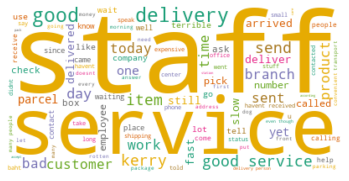

In [73]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

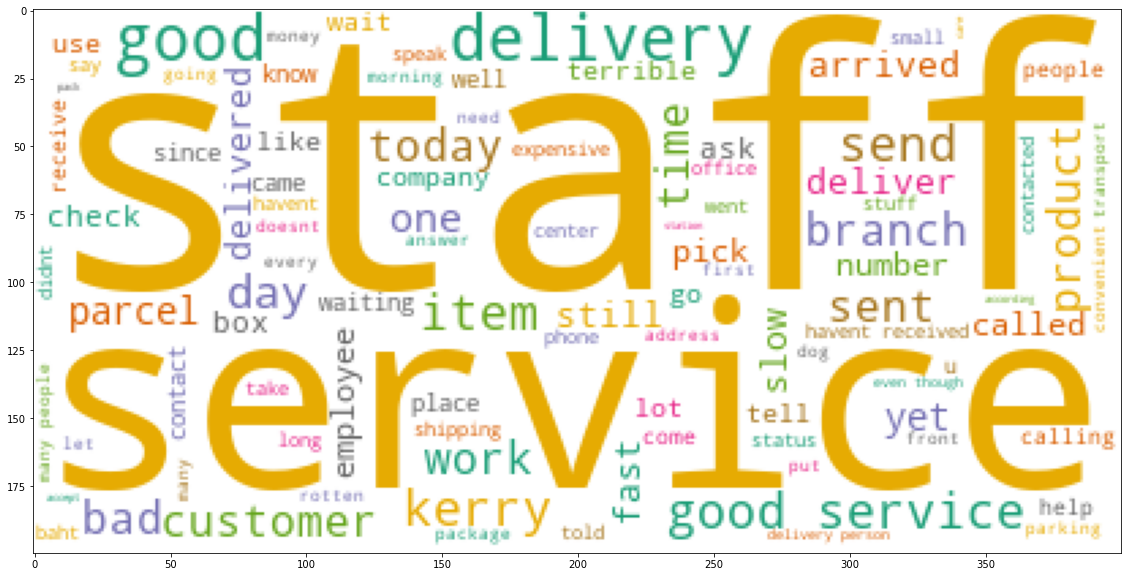

In [74]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [75]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews_processed2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews_processed2':'Late reviews'})

In [77]:
column_titles = ['rating','reviews','sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,reviews,sentiment
58,1.0,Waiting for the item to be delivered for a ve...,Negative
83,1.0,"If the destination is not collected, it will ...",Negative
86,1.0,"Lat Krabang area, delivery is very slow, can'...",Negative
106,1.0,"Terrible, slow delivery, not available, it's ...",Negative
107,1.0,"Very difficult to contact, call 1217 Pick it ...",Negative
110,1.0,"Why it sucks, Kerry Fireworks, the rotten stu...",Negative
163,1.0,Slow delivery as a nation The service staff i...,Negative
185,1.0,Contact did not deliver as late as the worst ...,Negative
202,2.0,You pay a very high price but the delivery is ...,Negative


In [78]:
df_late.to_csv('Late_reviews_kerryth.csv')